In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\maheh\\Downloads\\Decision Tree\\heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [2]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [3]:
df.value_counts()

age  sex     cp               trestbps  chol  fbs    restecg           thalch  exang  oldpeak  slope      thal               num
29   Male    atypical angina  130       204   False  lv hypertrophy    202     FALSE  0.0      upsloping  normal             0      1
58   Male    atypical angina  136       164   False  st-t abnormality  99      TRUE   2.0      flat       normal             1      1
     Female  typical angina   150       283   True   lv hypertrophy    162     FALSE  1.0      upsloping  normal             0      1
     Male    asymptomatic     100       213   False  st-t abnormality  110     FALSE  0.0      flat       fixed defect       0      1
                                        234   False  normal            156     FALSE  0.1      upsloping  reversable defect  2      1
                                                                                                                                   ..
50   Male    asymptomatic     140       231   False  st-t abnormali

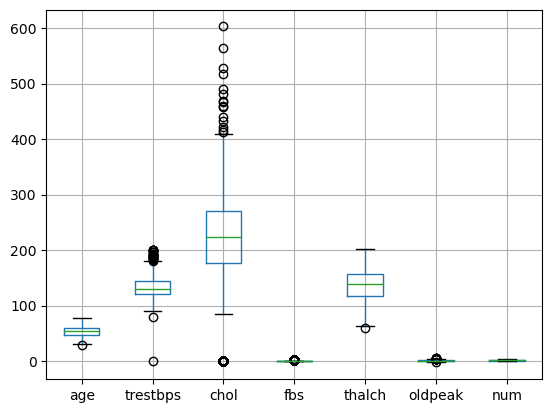

In [4]:
import matplotlib.pyplot as plt
plt.figure()
df.boxplot(figsize=(50,50))
plt.show()

C:\Users\maheh\AppData\Local\Temp\ipykernel_16968\2755865744.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


age        -0.136797
trestbps    0.353650
chol       -0.564766
fbs         1.473485
thalch     -0.219555
oldpeak     1.021709
num         0.951409
dtype: float64


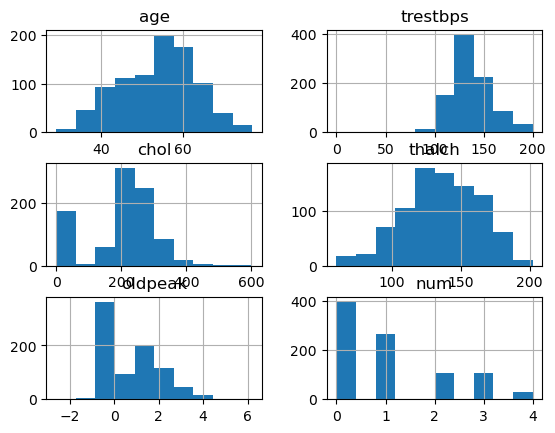

In [5]:
df.hist()
print(df.skew())

In [6]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#Initializing encoders
OHE=OneHotEncoder(sparse_output=False)
LE=LabelEncoder()
for columns in df.columns:
    if df[columns].dtype == 'object':
        df[columns]=OHE.fit_transform(df[[columns]])
    else:
        df[columns]=LE.fit_transform(df[columns])
df
#encoded_data = OHE.fit_transform(df[[columns]])
# Create a DataFrame for the one-hot encoded data and join it to the original DataFrame
#encoded_df = pd.DataFrame(encoded_data, columns=OHE.get_feature_names_out([columns]))
#df = pd.concat([df.drop(columns, axis=1), encoded_df], axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,34,0.0,0.0,47,89,1,1.0,79,1.0,33,1.0,1.0,0
1,12,0.0,0.0,39,59,0,0.0,61,1.0,10,0.0,1.0,0
2,28,0.0,1.0,43,48,0,0.0,77,1.0,14,0.0,1.0,0
3,23,0.0,0.0,23,44,0,1.0,117,1.0,10,0.0,1.0,0
4,28,0.0,1.0,16,57,0,0.0,55,0.0,25,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,24,0.0,1.0,29,0,0,0.0,49,1.0,25,0.0,1.0,4
904,33,0.0,1.0,63,28,0,0.0,49,0.0,39,0.0,0.0,4
905,27,0.0,0.0,66,0,0,1.0,52,0.0,35,1.0,0.0,4
906,27,0.0,0.0,46,64,1,0.0,34,0.0,53,1.0,1.0,4


In [7]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
for columns in df.columns:
    if df[columns].dtype=='object':
        df[columns]=SS.fit_transform(df[columns])
        
df    

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,34,0.0,0.0,47,89,1,1.0,79,1.0,33,1.0,1.0,0
1,12,0.0,0.0,39,59,0,0.0,61,1.0,10,0.0,1.0,0
2,28,0.0,1.0,43,48,0,0.0,77,1.0,14,0.0,1.0,0
3,23,0.0,0.0,23,44,0,1.0,117,1.0,10,0.0,1.0,0
4,28,0.0,1.0,16,57,0,0.0,55,0.0,25,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,24,0.0,1.0,29,0,0,0.0,49,1.0,25,0.0,1.0,4
904,33,0.0,1.0,63,28,0,0.0,49,0.0,39,0.0,0.0,4
905,27,0.0,0.0,66,0,0,1.0,52,0.0,35,1.0,0.0,4
906,27,0.0,0.0,46,64,1,0.0,34,0.0,53,1.0,1.0,4


In [8]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR

Outliers = ((df<Lower_limit) | (df>Upper_limit))
df_clean=df[~Outliers.any(axis=1)]
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
1,12,0.0,0.0,39,59,0,0.0,61,1.0,10,0.0,1.0,0
2,28,0.0,1.0,43,48,0,0.0,77,1.0,14,0.0,1.0,0
4,28,0.0,1.0,16,57,0,0.0,55,0.0,25,0.0,1.0,0
6,27,0.0,0.0,34,132,0,0.0,57,0.0,20,0.0,1.0,0
46,14,0.0,1.0,20,157,0,0.0,110,1.0,22,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,14,0.0,1.0,20,0,0,0.0,74,0.0,30,0.0,0.0,4
894,9,0.0,0.0,24,87,0,0.0,111,0.0,46,0.0,0.0,4
895,26,0.0,1.0,24,0,0,0.0,21,1.0,13,0.0,0.0,4
903,24,0.0,1.0,29,0,0,0.0,49,1.0,25,0.0,1.0,4


In [9]:
#Data partition
X=df_clean.drop(["num"],axis=1)
Y=df_clean["num"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 8, 7, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 3, 5, 7, 8],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=100, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X, Y)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


C:\Users\maheh\anaconda\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=100.
  warnings.warn(


Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 6}
Best Score:  0.5866666666666667


In [18]:
#Intializing
import numpy as np
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=10,min_samples_split=6,min_samples_leaf=8,max_features="sqrt",criterion="gini")

#Model fitting
model.fit(X_train,Y_train)

training_acc=model.score(X_train,Y_train)
testing_acc=model.score(X_test,Y_test)

#Accuarcy score

print("Training accuracy score is",np.round(training_acc,2))
print("Testing Accuracy score is",np.round(testing_acc,2))



Training accuracy score is 0.61
Testing Accuracy score is 0.74


In [21]:
#Cross Validation
from sklearn.metrics import accuracy_score
import numpy as np
training_accuracy=[]
testing_accuracy=[]
for i in range(1,201):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50)
    model=DecisionTreeClassifier(max_depth=10,min_samples_split=6,min_samples_leaf=8,max_features="sqrt",criterion="gini")
    model.fit(X_train,Y_train)
    Y_pred_train=model.predict(X_train)
    Y_pred_test=model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    testing_accuracy.append(accuracy_score(Y_test,Y_pred_test))
print("training_accuracy score is",np.round(np.mean(training_accuracy),2))
print("testing_accuracy score is",np.round(np.mean(testing_accuracy),2))


    



training_accuracy score is 0.62
testing_accuracy score is 0.62


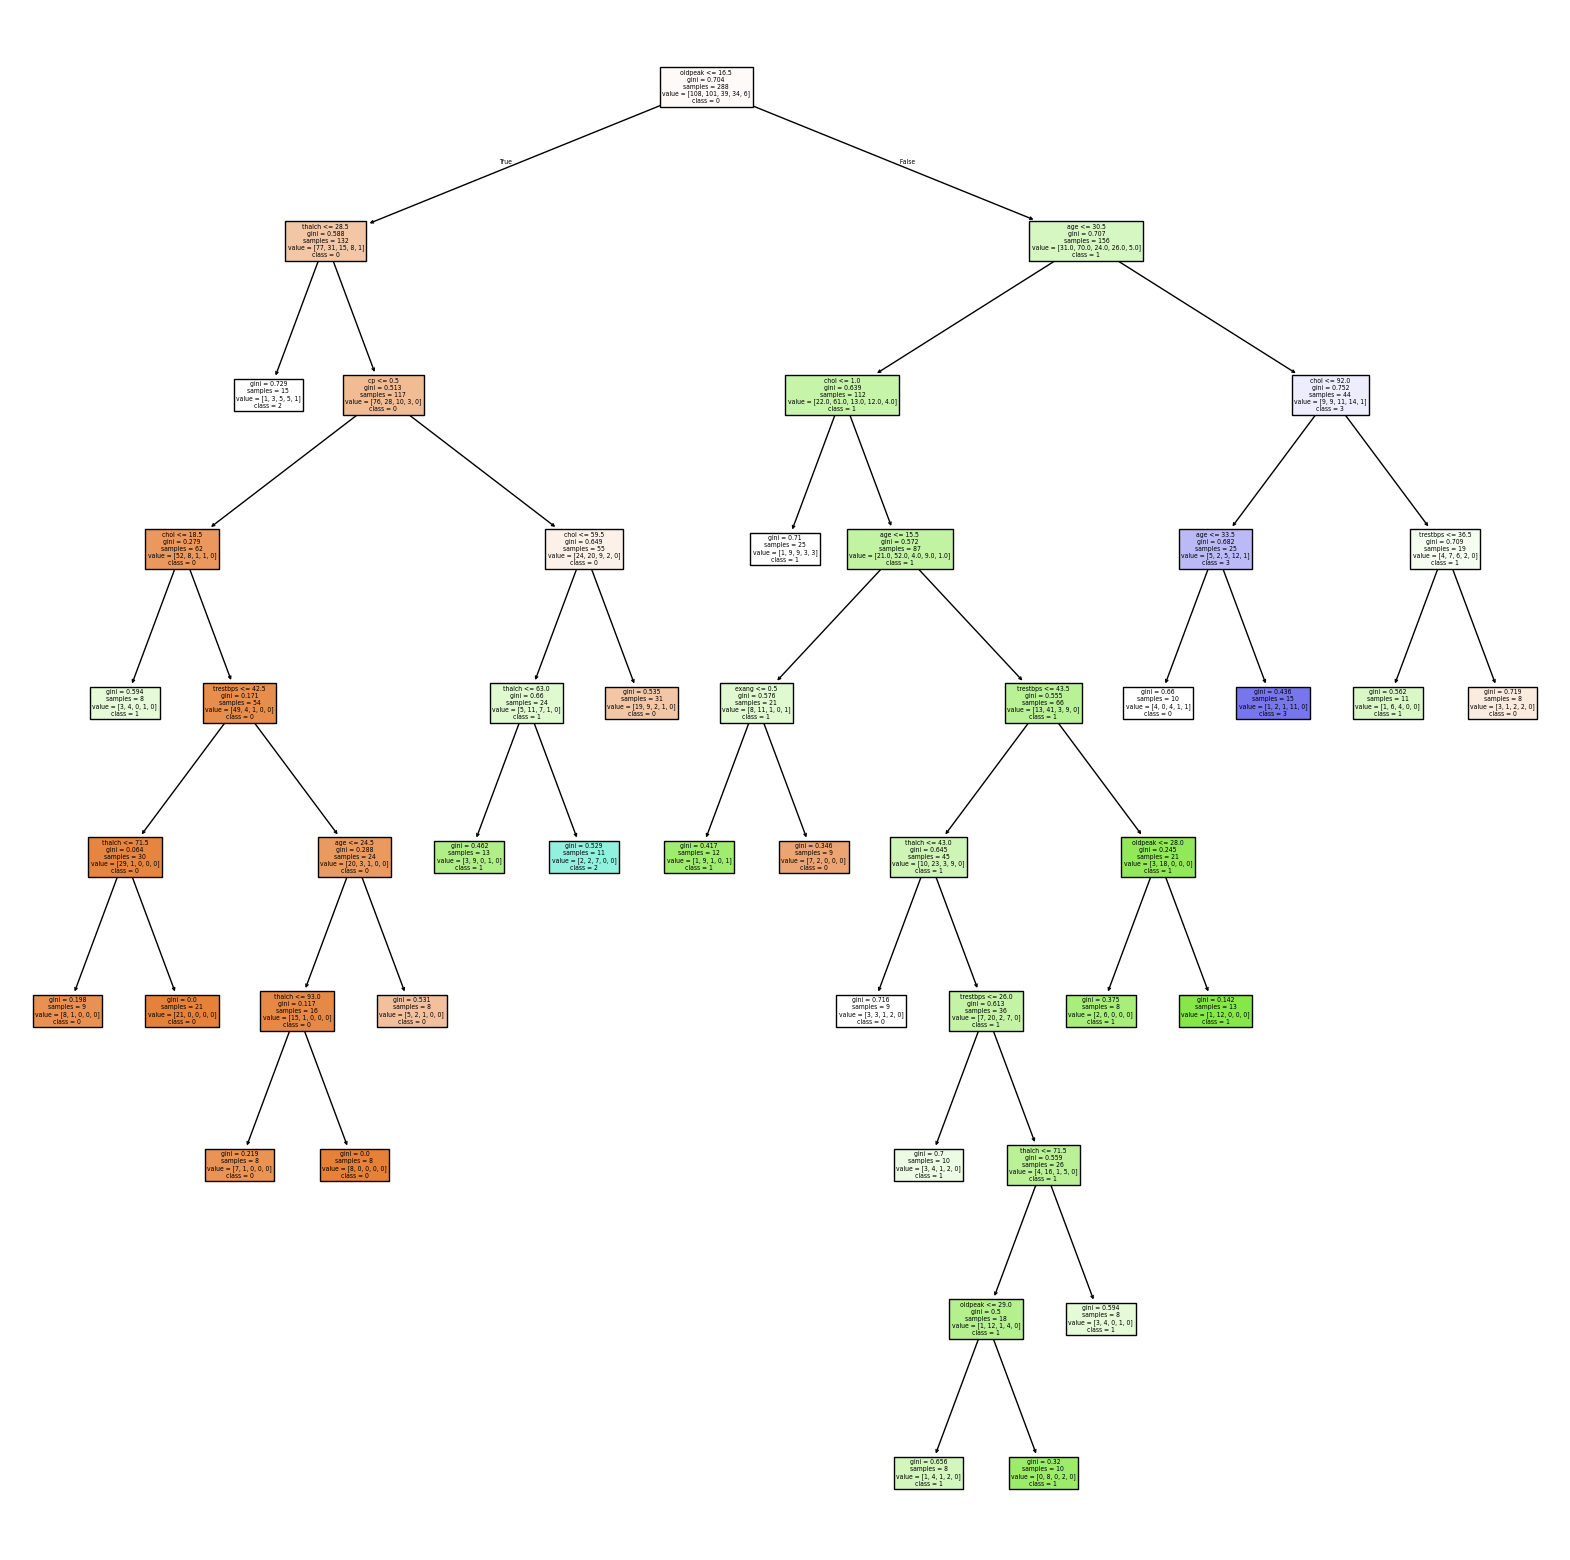

In [22]:
import matplotlib.pyplot as plt
from sklearn import tree
# Plot the decision tree
plt.figure(figsize=(20,20))

tree.plot_tree(model, feature_names=X.columns, class_names=["0","1","2","3","4"], filled=True)
plt.show()

INTERVIEW QUESTIONS:

HYPER PARAMETERS: 
    max_depth: Limits the depth of the tree. A shallower tree prevents overfitting but might underfit.

min_samples_split:
    Minimum number of samples required to split an internal node. Higher values prevent overfitting.

min_samples_leaf:
    Minimum number of samples required to be at a leaf node. Higher values make the model more robust.

max_features:
    Number of features to consider when looking for the best split. Controls model complexity.

criterion: 
    Function to measure the quality of a split. Common choices are "gini" for Gini impurity and "entropy" for information gain.

Label Encoding:
    Converts each unique category in a column to a numerical label.

Example:
"cat" -> 0
"dog" -> 1
"fish" -> 2
Use Case: Suitable for ordinal categories where there is a meaningful order but no numerical significance (e.g., ['small', 'medium', 'large']).

One-Hot Encoding:
Creates new columns for each unique category, assigning binary values (0 or 1) to indicate the presence of each category.

Example:
"cat" -> [1, 0, 0]
"dog" -> [0, 1, 0]
"fish" -> [0, 0, 1]
Use Case: Best for nominal categories with no ordinal relationship (e.g., ['red', 'green', 'blue']).